<h1><font color='blue'> Workshop 1 - Data analysis with Pandas -Adult</font></h1>

**By completing this notebook, you will be able to:**

* Program in Python using jupyter notebook.
* Perform data analysis using Pandas.
* Practice data pre-processing methods.
* Analyze and summarise dataset by finding facts from the data.

In this notebook, you will be using **Pandas** to read Adult dataset and to perform some basic analysis to improve
your understanding of the dataset by completing the notebook and answering questions provided in the notebook.
You will also be using **matplotlib** for **data visualisation**. The notebook will also introduce you to **data analysis
and pre-processing**, which are important phases of **data mining**.

To run the notebook, restart the Kernel by selecting Restart & Clear Output. Then run each cell one at a time.

### Task: This notebook is a part of your assessment. 
This Notebook demonstrates various processes of data
analysis step-by-step. 
* You are required to perform these processes in a new (this) Notebook on Adult dataset.
* Complete all the sections of the notebook by writing and running all the code provided in this notebook; and 
* By writing appropriate codes and description to answer questions provided throughout the notebook including Tryit-yourself 
* And the Report section of the notebook. 
* Save and submit the completed notebook in a readable pdfformat.

* Please read Adult webpage carefully including Attribute Information section to familiarise yourself with the
data and the data structure.
* To download data, click 'Data Folder' and select 'adult.data'. Save the data file as .csv file.
* Attributes: You will also need to see 'adult.names' for the attribute names. Insert a row at the top of the
dataset and add attribute names to the respective columns. You will notice that the last column has no
name. Name the last column as 'class-label'.

**[Dataset: Adult](https://archive.ics.uci.edu/ml/datasets/Adult (https://archive.ics.uci.edu/ml/datasets/Adult))**

_Dr. Vinita Nahar, University of Wolverhampton, UK._

#### About The Adult Data Set:
**Abstract:** Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.<br>
**Data Set Information:** Extraction was done by Barry Becker from the 1994 Census database.

|Data Set Characteristics:|Multivariate|Number of Instances:|48842|Area:|Social|
|-|-|-|-|-|-|
|Attribute Characteristics:|Categorical, Integer|Number of Attributes:|14|Date Donated|1996-05-01|
|Associated Tasks:|Classification|Missing Values?|Yes|Number of Web Hits:|2376516|

**Importing necessary modules...**

In [1]:
#Importing necessary libraries
import pandas as pd  # for tabular dataframe
import numpy as np  # for numerical computation
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline
import os  # for handling files and folders
print('All Modules Imported!')

All Modules Imported!


### Loading The Dataset
We can load the dataset directly into the current working directory using the **curl** command right within Jupyter Notebook. in the same command, we shall name the dataset as _adult.csv_

In [2]:
# first, we remove any copies of the dataset incase available
! rm adult.csv

# Next we download the dataset directly to this folder using curl,
# Saving it with the name adult.csv
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -o adult.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 3881k    0 15872    0     0   6995      0  0:09:28  0:00:02  0:09:26  7001
 12 3881k   12  496k    0     0   153k      0  0:00:25  0:00:03  0:00:22  153k
 84 3881k   84 3270k    0     0   768k      0  0:00:05  0:00:04  0:00:01  768k
100 3881k  100 3881k    0     0   872k      0  0:00:04  0:00:04 --:--:--  923k


In [3]:
# Next, let's download the feature names from UCI using curl as names.csv
! rm names.csv
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names -o names.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5229  100  5229    0     0   4156      0  0:00:01  0:00:01 --:--:--  4159


In [4]:
# Let's use the os module to print the files in the current folder
# we want to be sure that adult.csv and names.csv files are present

os.listdir()

['.idea',
 '.ipynb_checkpoints',
 '7CS033 Assessment Brief 2021-22.pdf',
 '7CS033 Marking Scheme.pdf',
 'adult.csv',
 'names.csv',
 'Workshop 1 - Data Analysis with Pandas - Adult.pdf',
 'Workshop1_Data_Analysis_with_Pandas.ipynb']

In [5]:
# As instructed, I shall carefully copy out the feature names to a list, below
# paying attention to the data dictionary on UCI

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', \
         'marital-status', 'occupation', 'relationship', \
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', \
        'native-country', 'class-label']

In [6]:
# Let's load the dataset initially to a pandas dateframe to be sure the download is ok.
# The dataset has no columns, so I'd use the names as provided.

data = pd.read_csv('adult.csv', names=names)

In [7]:
# Let's see the first 5 rows

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### <font color='red'>Q1. Use head(2), head(10), tail(2). Explain your observations, in no more than 2 to 3 lines.</font>

In [8]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
data.tail(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#### Observations:
1. `head(2)`, `head(10)` and `tail(2)` show the first 2, first 10 and last 2 observations respectively of the dataset.
2. `.head()` or `.tail()` are methods of the Dataframe object. Passing a number to it outputs that many rows from the top or bottom of the Dataframe.
3. Whether we call `data.head()` or `data.tail()`, the output includes the column and index. Also, in this case, the outputs are not saved to any variable.

In [11]:
print(f'data shape: {data.shape}')

data shape: (32561, 15)


The DataFrame.shape property tells you the dimensionality of the dataset (Pandas DataFrame) in the form of
number of rows and columns. In this case, there are 32561 rows and 15 columns.

## <font color ='blue'> Generating your unique dataset for this task</font>
**Please follow these instructions carefully.**

For this task, you are required to generate your own version of dataset. To achieve this, replace 48 in
ramdom_state with the last two digits of your student number. i.e.'48' → 'last two digits of your student number'.
If the first number starts with '0', replace '0' with '2'. E.g., if the last two digits of your student number is '05', use
'25' instead. Failing to do so may result in '0' or reduced grades for this task.

In [12]:
# my student number 2039070

data = data.sample(n=30000, random_state=70)

In [13]:
data.shape

(30000, 15)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,38.589133,13.635182,17.0,28.0,37.0,48.00,90.0
fnlwgt,30000.0,189598.418933,105607.910312,12285.0,117776.0,178348.5,236704.75,1484705.0
education-num,30000.0,10.080400,2.572396,1.0,9.0,10.0,12.00,16.0
capital-gain,30000.0,1086.949933,7459.713916,0.0,0.0,0.0,0.00,99999.0
capital-loss,30000.0,87.256033,403.036258,0.0,0.0,0.0,0.00,4356.0
hours-per-week,30000.0,40.435300,12.346850,1.0,40.0,40.0,45.00,99.0


In [15]:
data['education-num'].value_counts()

9     9676
10    6714
13    4955
14    1578
11    1267
7     1081
12     984
6      861
4      598
15     524
5      483
8      393
16     383
3      304
2      153
1       46
Name: education-num, dtype: int64

In [16]:
data['education'].value_counts()

 HS-grad         9676
 Some-college    6714
 Bachelors       4955
 Masters         1578
 Assoc-voc       1267
 11th            1081
 Assoc-acdm       984
 10th             861
 7th-8th          598
 Prof-school      524
 9th              483
 12th             393
 Doctorate        383
 5th-6th          304
 1st-4th          153
 Preschool         46
Name: education, dtype: int64

In [17]:
data = data.drop('fnlwgt', axis=1)

The above cell will drop/remove 'fnlwgt' from data.<br>
drop(): To drop a column from the dataframe, pass agruments - column name to be dropped and `axis = 1`. `axis
= 0` is to dropping row.

In [18]:
data.shape

(30000, 14)

Yow will notice that there are now 14 columns instead of 15.

In [19]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30000,NaN,NaN,NaN,38.5891,13.6352,17,28,37,48,90
workclass,30000,9,Private,20927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,30000,16,HS-grad,9676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,30000,NaN,NaN,NaN,10.0804,2.5724,1,9,10,12,16
marital-status,30000,7,Married-civ-spouse,13791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30000,15,Prof-specialty,3818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30000,6,Husband,12166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30000,5,White,25615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30000,2,Male,20049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,30000,NaN,NaN,NaN,1086.95,7459.71,0,0,0,0,99999


In [20]:
data['education'].value_counts()

 HS-grad         9676
 Some-college    6714
 Bachelors       4955
 Masters         1578
 Assoc-voc       1267
 11th            1081
 Assoc-acdm       984
 10th             861
 7th-8th          598
 Prof-school      524
 9th              483
 12th             393
 Doctorate        383
 5th-6th          304
 1st-4th          153
 Preschool         46
Name: education, dtype: int64

value_counts() produces a frequency table, which shows occurrence of each unique value per feature or attribute in a dataset

In [21]:
data['education'].nunique()

16

In [22]:
data['age'].value_counts()

31    824
35    821
36    812
23    807
28    804
     ... 
83      5
88      3
85      3
87      1
86      1
Name: age, Length: 73, dtype: int64

You may agree that using `value_counts()` for `‘age’` is not a great example as the frequency table is too lengthy
to be analysed. This is due to `'age'` being continuous value and frequency of each value is displayed. Let's
visualise `'age'` through graphs instead to make observations.

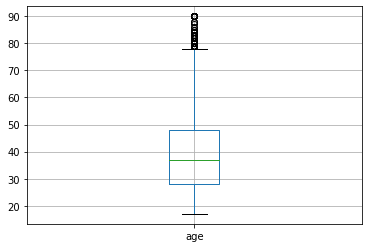

In [23]:
data.boxplot(column='age')
plt.show()

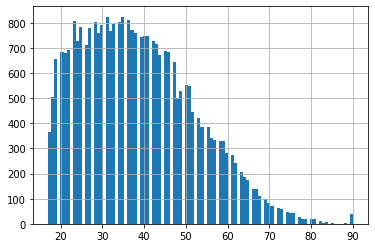

In [24]:
data['age'].hist(bins=100)
plt.show()

In [25]:
# The age histogram seems right-skewed, just like the boxplot too.
# This tends to suggest that the mean-age is larger than the median
# As large values at the far-right, drag the mean-age, let's check

data.age.mean() > data.age.median()

True

In [26]:
data['sex'].value_counts()

 Male      20049
 Female     9951
Name: sex, dtype: int64

In [27]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class-label'],
      dtype='object')

In [28]:
data['workclass'].value_counts()

 Private             20927
 Self-emp-not-inc     2336
 Local-gov            1925
 ?                    1694
 State-gov            1191
 Self-emp-inc         1020
 Federal-gov           888
 Without-pay            13
 Never-worked            6
Name: workclass, dtype: int64

### <font color='red'>Q2. How many males and females exist in the dataset? In a new cell, use a correct command to answer the question and write your answer.</font>

In [29]:
# I will simply apply indexing to the previous command

num_males = data.sex.value_counts()[0]
num_females = data.sex.value_counts()[1]

print(f'There are {num_males} males and {num_females} females in the dataset.')

There are 20049 males and 9951 females in the dataset.


## <font color='blue'>Applying groupby functions in order to summarise the data.</font>
Groupby functions are usually used with aggregate functions, which are useful to summarise the dataset and
make observations. Some common functions are SUM, MEAN, MAX, MIN and COUNT. Using groupby, we can
answer questions such as:

**Question: What is the average age of each gender in the given population?**

In [30]:
data.age.groupby(data.sex).mean()

sex
 Female    36.851271
 Male      39.451693
Name: age, dtype: float64

In the above cell, we group by 'sex' and computed the mean 'age'.

**Question. What is the average age of male and female across different education categories?**

In [31]:
data.age.groupby([data.sex, data.education]).mean()

sex      education    
 Female   10th            35.319703
          11th            30.348148
          12th            30.150376
          1st-4th         49.976190
          5th-6th         45.285714
          7th-8th         50.165563
          9th             41.789855
          Assoc-acdm      36.413265
          Assoc-voc       37.823276
          Bachelors       35.619906
          Doctorate       45.120482
          HS-grad         38.593172
          Masters         42.932515
          Preschool       42.266667
          Prof-school     40.716049
          Some-college    33.788454
 Male     10th            38.094595
          11th            33.331361
          12th            32.826923
          1st-4th         45.684685
          5th-6th         41.656388
          7th-8th         48.255034
          9th             40.492754
          Assoc-acdm      38.064189
          Assoc-voc       39.022416
          Bachelors       40.395604
          Doctorate       48.160000
     

In the above code, we group by 'sex' and 'education' and computed mean 'age' in the given population.

#### NOTE: groupby can be applied on numeric attributes only.
For some simple examples on groupby, please refer to the [**link**](http://www.datasciencemadesimple.com/group-dataframe-python-pandas-group-function-pandas/)

### <font color='red'>Q3. What is the average contribution to capital-gain of each sex and occupation category?</font>

In [32]:
data['capital-gain'].groupby([data.sex, data.occupation]).mean()

sex      occupation        
 Female   ?                     351.420716
          Adm-clerical          508.543497
          Craft-repair          807.793269
          Exec-managerial      1022.757263
          Farming-fishing      1293.019231
          Handlers-cleaners     151.421769
          Machine-op-inspct     149.511583
          Other-service         160.582691
          Priv-house-serv       302.651163
          Prof-specialty       1304.731568
          Protective-serv      1734.301370
          Sales                 281.543199
          Tech-support          658.773292
          Transport-moving      455.589744
 Male     ?                     877.041394
          Adm-clerical          480.800352
          Armed-Forces            0.000000
          Craft-repair          659.414846
          Exec-managerial      2778.056962
          Farming-fishing       504.397390
          Handlers-cleaners     286.047748
          Machine-op-inspct     397.674191
          Other-service   

### <font color='red'>Q4. Identify the average capital-gain by males and females accross different marital-status.</font>

In [33]:
data['capital-gain'].groupby([data.sex, data['marital-status']]).mean()

sex      marital-status        
 Female   Divorced                  454.577590
          Married-AF-spouse         204.076923
          Married-civ-spouse       1615.607662
          Married-spouse-absent     373.540404
          Never-married             335.807964
          Separated                 366.775891
          Widowed                   493.536137
 Male     Divorced                 1157.684535
          Married-AF-spouse         810.888889
          Married-civ-spouse       1791.060031
          Married-spouse-absent    1037.455026
          Never-married             434.198822
          Separated                 872.103825
          Widowed                   925.869281
Name: capital-gain, dtype: float64

**Question. What is the maximum age accross differnt races?**<br>
Let's first see what are the different races and then apply groupby.

In [34]:
data.race.value_counts()

 White                 25615
 Black                  2890
 Asian-Pac-Islander      961
 Amer-Indian-Eskimo      281
 Other                   253
Name: race, dtype: int64

In [35]:
data.age.groupby(data.race).max()

race
 Amer-Indian-Eskimo    82
 Asian-Pac-Islander    90
 Black                 90
 Other                 77
 White                 90
Name: age, dtype: int64

### <font color='red'>Q5. Are minimum and maximum age by sex same?</font>

In [36]:
# Minimum age by sex:

data.age.groupby(data.sex).min()

sex
 Female    17
 Male      17
Name: age, dtype: int64

In [37]:
# Maximum age by sex:

data.age.groupby(data.sex).max()

sex
 Female    90
 Male      90
Name: age, dtype: int64

**Answer:** Yes, minimum and maximum age by sex are the same.

## <font color='blue'>Data visualisation</font>
**Matplotlib is python library for visualising data in the form of graphs such as histograms, scatter, box
plot, line plots, heat plots, etc.**

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,38.589133,13.635182,17.0,28.0,37.0,48.0,90.0
education-num,30000.0,10.080400,2.572396,1.0,9.0,10.0,12.0,16.0
capital-gain,30000.0,1086.949933,7459.713916,0.0,0.0,0.0,0.0,99999.0
capital-loss,30000.0,87.256033,403.036258,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30000.0,40.435300,12.346850,1.0,40.0,40.0,45.0,99.0


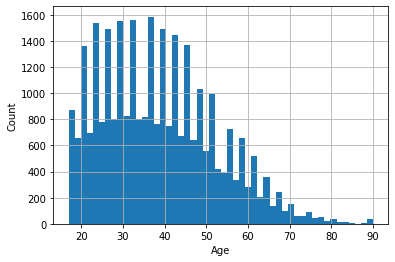

In [40]:
data.age.hist(bins=50)
# adding x and y labels
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Histograms: 
Are used to represent the distribution of a dataset. The bars of the histograms are known as _bins_ or
_"bucket"_ – the range of values. Bins are of same width. Width of the bins can be calculated as 
```
binwidth = (max value of data – min value of data) / total number of bins. 
```
The bins are usually specified as continuous, non-overlapping
intervals of a variable.
In the above figure, histogram with bins = 50 is used to show number of people belongs to different age-groups.
Here, x-axis represents `'age'` and y-axis represents the `'count'`. Try-it-yourself: change bins = 100 and run the
cell to observe the difference for your own understanding.

In [50]:
def calculate_binwidth(df, col, bins):
    """This method calculates the binwidth 
        given the dataframe, column and bins
        
    @param df: a dataframe
    @param col: str, the column name
    @param bins: int, number of bins specified
    @return: a number, binwidth
    """
    binwidth = (max(df[col]) - min(df[col])) / bins
    return binwidth

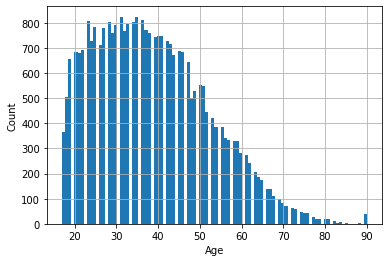

In [48]:
data.age.hist(bins=100)
# adding x and y labels
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

below, I will calculate binwidth for the age column using binsizes of 50 and 100...

In [51]:
bins_50 = 50
bins_100 = 100

binsize_50 = calculate_binwidth(data, 'age', bins_50)
binsize_100 = calculate_binwidth(data, 'age', bins_100)

print(f'50 bins: {binsize_50} binwidth\n100 bins: {binsize_100} binwidth')

50 bins: 1.46 binwidth
100 bins: 0.73 binwidth


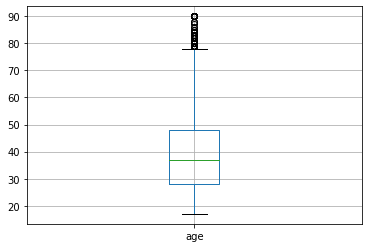

In [44]:
data.boxplot(column='age')
plt.show()

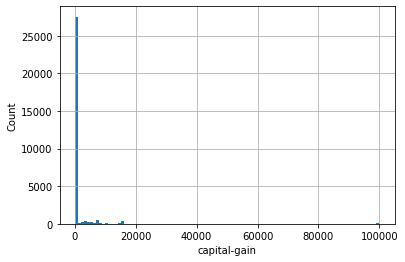

In [53]:
data['capital-gain'].hist(bins=100)
# adding x and y labels
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.show()

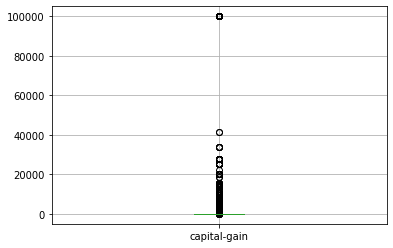

In [55]:
data.boxplot(column='capital-gain')
plt.show()

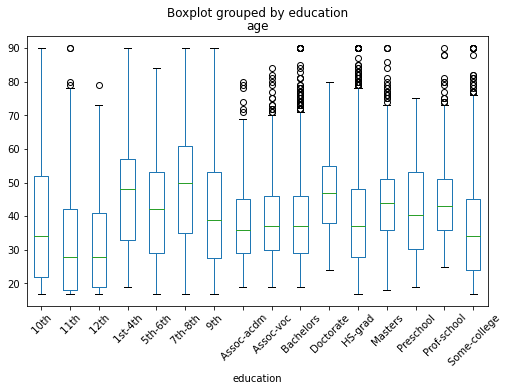

In [60]:
data.boxplot(column='age', by = 'education', grid=False, rot = 45, fontsize = 10, figsize=(8,5))
plt.show()

In [61]:
data.education.value_counts()

 HS-grad         9676
 Some-college    6714
 Bachelors       4955
 Masters         1578
 Assoc-voc       1267
 11th            1081
 Assoc-acdm       984
 10th             861
 7th-8th          598
 Prof-school      524
 9th              483
 12th             393
 Doctorate        383
 5th-6th          304
 1st-4th          153
 Preschool         46
Name: education, dtype: int64

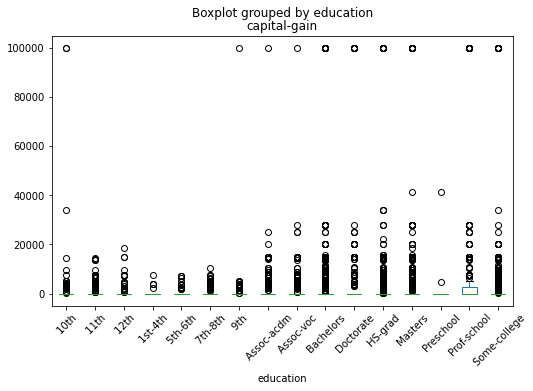

In [64]:
data.boxplot(column='capital-gain', by = 'education', grid=False, rot = 45, fontsize = 10, figsize=(8,5))
plt.show()